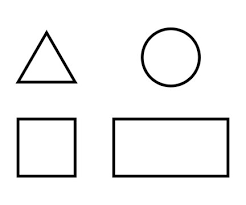

In [2]:
# load image and convert it to gray scale
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

my_image = cv2.imread('Q7.png' , 0)
cv2_imshow(my_image)

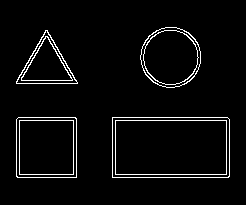

In [3]:
import numpy as np

# create a binary image
edges = cv2.Canny(my_image, 50, 90)

cv2_imshow(edges)

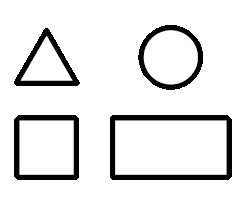

In [4]:
# find contours 
contours, treshhold = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#draw the edges on the image
with_edge = my_image.copy()
#draw a line on the edges 
cv2.drawContours(with_edge, contours, -1, (0, 255, 0), 4)

color_image = cv2.cvtColor(with_edge, cv2.COLOR_GRAY2BGR)
cv2_imshow(with_edge)


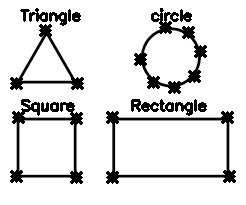

In [6]:
for contour in contours:
    #find corners
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)

    for point in approx:
        #mark the corners
        cv2.drawMarker(my_image, tuple(point[0]), (0, 0, 255), cv2.MARKER_STAR, 10, 2)

    #find the shape and write it on the image
    if len(approx) == 3:
        shape_class = "Triangle"
        cv2.putText(my_image, shape_class, (20 , 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(contour)
        if w == h:
          shape_class = "Square"
          cv2.putText(my_image, shape_class, (20 , 110), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        else :
          shape_class = "Rectangle"
          cv2.putText(my_image, shape_class, (130 , 110), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    elif len(approx) == 5:
        shape_class = "Pentagon"

    else:
        shape_class = "circle"
        cv2.putText(my_image, shape_class, (150 , 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        

cv2_imshow(my_image)